# **Seismic Analysis based on ML algorithms**
*Authorized by: Shayan Mansornia*

# Importing Libraries

In [382]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv

%matplotlib inline

# Reading the CSV files 
**read these datasets to understand what this files contain**

In [383]:
# Read the two CSV files
df = pd.read_csv(r'D:\Django Programming\Smart-exploration-in-the-oil-and-gas-industry\datasets\Asia\MiddleEast_EQ.csv')

In [384]:
df.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2025,3,10,08:46:23,29.4815,51.5703,10.0,4.7,"17 km SSW of Kāzerūn, Iran",1741596383
1,2025,3,9,23:27:52,24.6250,50.2773,10.0,4.1,"84 km SW of Umm Bāb, Qatar",1741562872
2,2025,3,9,21:16:18,36.5525,71.3579,110.6,4.2,"21 km SW of Ashkāsham, Afghanistan",1741554978
3,2025,3,8,18:42:33,27.3610,55.0404,10.0,4.7,"90 km N of Bandar-e Lengeh, Iran",1741459353
4,2025,3,8,11:28:26,42.4647,45.1902,6.7,4.1,"42 km N of Mat’ani, Georgia",1741433306


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       5000 non-null   int64  
 1   Month      5000 non-null   int64  
 2   Day        5000 non-null   int64  
 3   Time       5000 non-null   object 
 4   Lat        5000 non-null   float64
 5   Lon        5000 non-null   float64
 6   Depth      5000 non-null   float64
 7   Mag        5000 non-null   float64
 8   Region     5000 non-null   object 
 9   Timestamp  5000 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 390.8+ KB


# Plotting the stats

C:\Users\Shayan\AppData\Local\Temp\ipykernel_24100\3546954493.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, ax=axes[1, 1], palette="magma", legend=False)


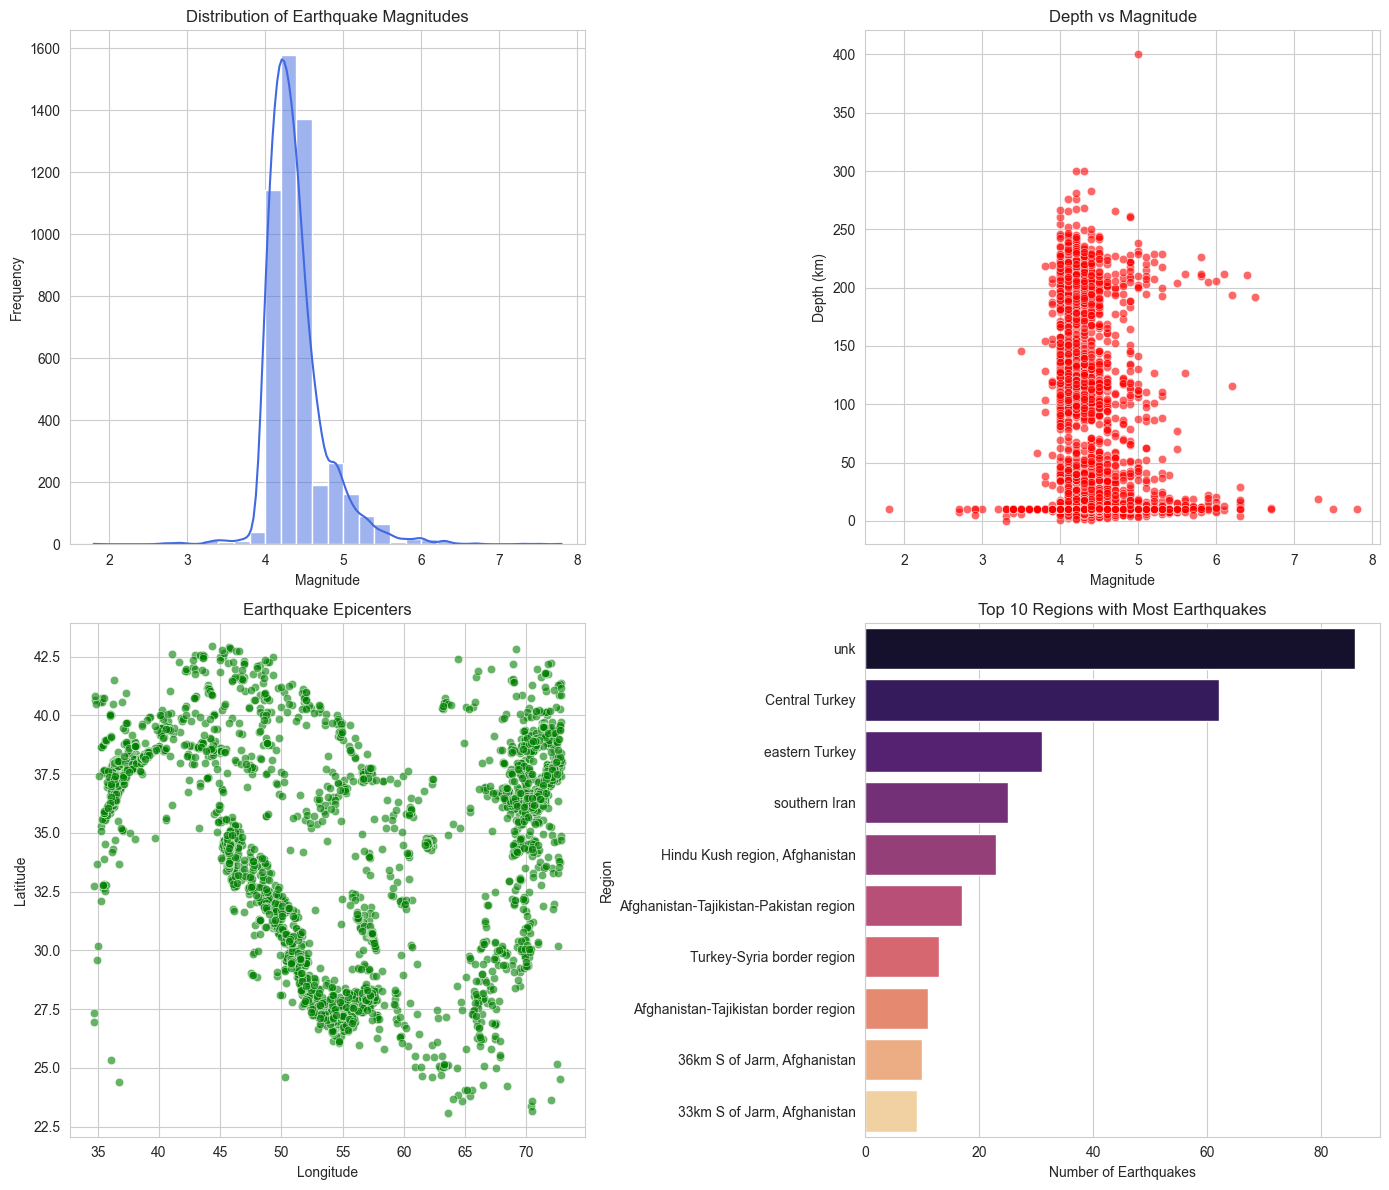

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histogram of Earthquake Magnitude
sns.histplot(df["Mag"], bins=30, kde=True, ax=axes[0, 0], color="royalblue")
axes[0, 0].set_title("Distribution of Earthquake Magnitudes")
axes[0, 0].set_xlabel("Magnitude")
axes[0, 0].set_ylabel("Frequency")

# 2. Scatter Plot: Depth vs Magnitude
sns.scatterplot(x=df["Mag"], y=df["Depth"], alpha=0.6, ax=axes[0, 1], color="red")
axes[0, 1].set_title("Depth vs Magnitude")
axes[0, 1].set_xlabel("Magnitude")
axes[0, 1].set_ylabel("Depth (km)")

# 3. Scatter Plot: Earthquake Locations (Latitude vs Longitude)
sns.scatterplot(x=df["Lon"], y=df["Lat"], alpha=0.6, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Earthquake Epicenters")
axes[1, 0].set_xlabel("Longitude")
axes[1, 0].set_ylabel("Latitude")

# 4. Bar Plot: Number of Earthquakes per Region (Top 10 regions)
top_regions = df["Region"].value_counts().nlargest(10)
sns.barplot(x=top_regions.values, y=top_regions.index, ax=axes[1, 1], palette="magma", legend=False)
axes[1, 1].set_title("Top 10 Regions with Most Earthquakes")
axes[1, 1].set_xlabel("Number of Earthquakes")
axes[1, 1].set_ylabel("Region")

# Adjust layout
plt.tight_layout()


plt.show()

# Seasonal pattern analysis

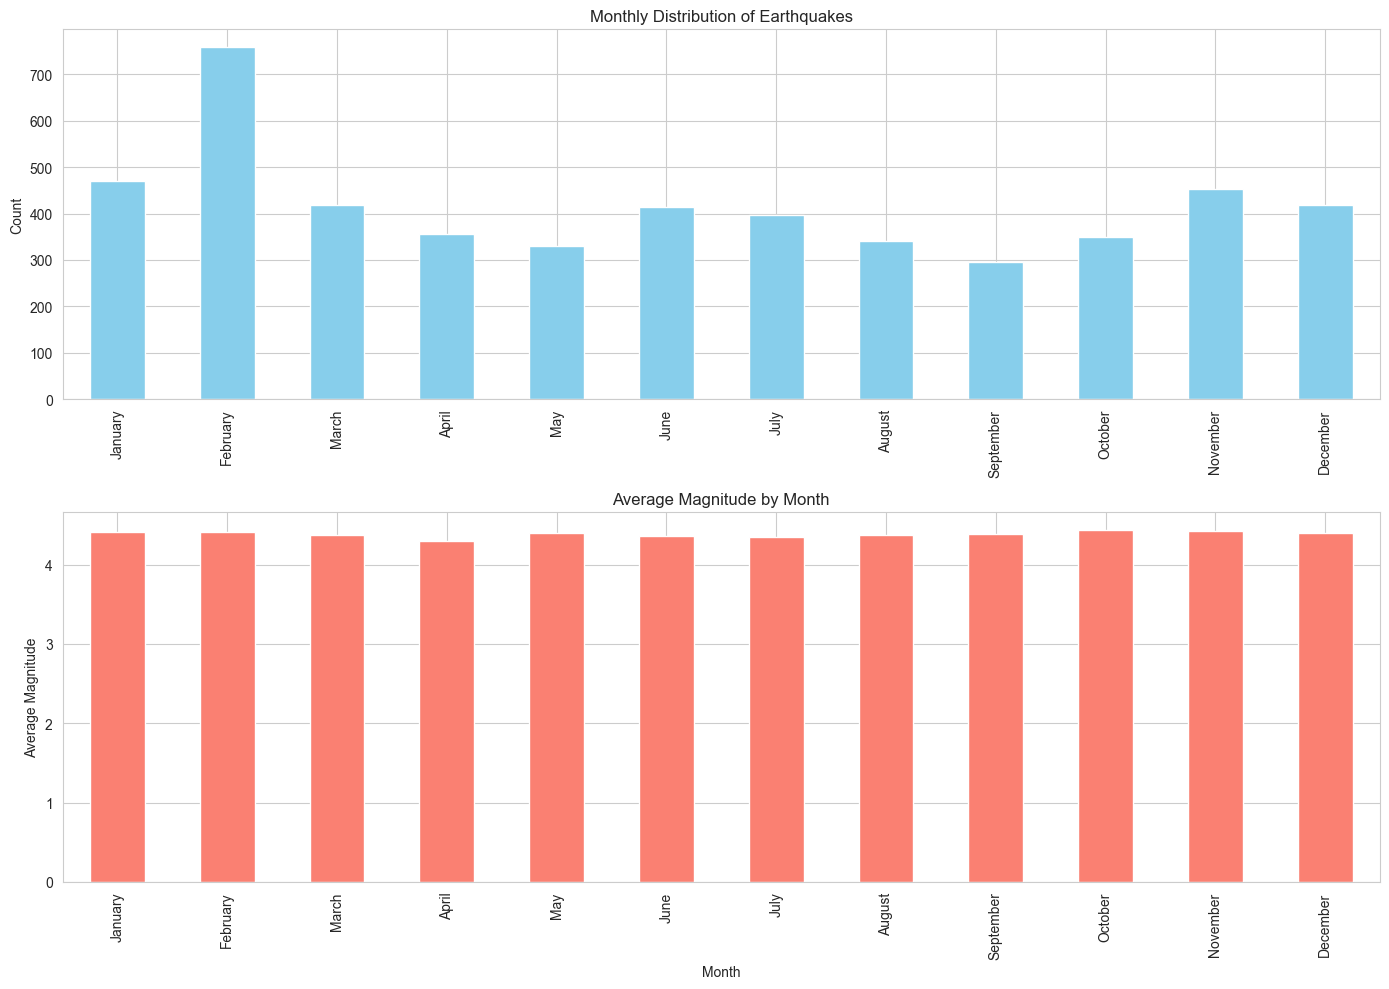

In [387]:
if 'Month' in df.columns:
        # Group by month and calculate statistics
        monthly_stats = df.groupby('Month').agg({
            'Mag': ['count', 'mean', 'median', 'max'],
            'Depth': ['mean', 'max']
        })
        
        monthly_stats.columns = [
            'Count', 'Mean Magnitude', 'Median Magnitude', 'Max Magnitude',
            'Mean Depth', 'Max Depth'
        ]
        
        # Convert to month names for better readability
        month_names = {
            1: 'January', 2: 'February', 3: 'March', 4: 'April',
            5: 'May', 6: 'June', 7: 'July', 8: 'August',
            9: 'September', 10: 'October', 11: 'November', 12: 'December'
        }
        
        monthly_stats.index = [month_names[m] for m in monthly_stats.index]
        
        # Reorder to start with January
        monthly_stats = monthly_stats.reindex(list(month_names.values()))
        
        # Plot monthly patterns
        fig, axes = plt.subplots(2, 1, figsize=(14, 10))
        
        monthly_stats['Count'].plot(kind='bar', ax=axes[0], color='skyblue')
        axes[0].set_title('Monthly Distribution of Earthquakes')
        axes[0].set_xlabel('')
        axes[0].set_ylabel('Count')
        axes[0].grid(True, axis='y')
        
        monthly_stats['Mean Magnitude'].plot(kind='bar', ax=axes[1], color='salmon')
        axes[1].set_title('Average Magnitude by Month')
        axes[1].set_xlabel('Month')
        axes[1].set_ylabel('Average Magnitude')
        axes[1].grid(True, axis='y')
        
        plt.tight_layout()
        plt.show()

## **Performing Data Cleaning and Analysis**

<br>**Variable        Description**</br>

1. **Year** - Year of the earthquake event.  
2. **Month** - Month of the earthquake event.  
3. **Day** - Day of the earthquake event.  
4. **Time** - Time of occurrence in HH:MM:SS format (UTC).  
5. **Lat** - Latitude coordinate of the earthquake epicenter.  
6. **Lon** - Longitude coordinate of the earthquake epicenter.  
7. **Depth** - Depth of the earthquake in kilometers.  
8. **Mag** - Magnitude of the earthquake on the Richter scale.  
9. **Region** - Geographical region where the earthquake occurred.  
10. **Timestamp** - Unix timestamp representing the exact time of the event.

In [388]:
# Create datetime column
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1) + ' ' + df['Time'])
df.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp,datetime
0,2025,3,10,08:46:23,29.4815,51.5703,10.0,4.7,"17 km SSW of Kāzerūn, Iran",1741596383,2025-03-10 08:46:23
1,2025,3,9,23:27:52,24.6250,50.2773,10.0,4.1,"84 km SW of Umm Bāb, Qatar",1741562872,2025-03-09 23:27:52
2,2025,3,9,21:16:18,36.5525,71.3579,110.6,4.2,"21 km SW of Ashkāsham, Afghanistan",1741554978,2025-03-09 21:16:18
3,2025,3,8,18:42:33,27.3610,55.0404,10.0,4.7,"90 km N of Bandar-e Lengeh, Iran",1741459353,2025-03-08 18:42:33
4,2025,3,8,11:28:26,42.4647,45.1902,6.7,4.1,"42 km N of Mat’ani, Georgia",1741433306,2025-03-08 11:28:26


In [389]:
# Convert numeric columns to appropriate format
numeric_columns = ['Lat', 'Lon', 'Depth', 'Mag']
for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [390]:
# Rename columns for consistency
df = df.rename(columns={
        'Lat': 'latitude',
        'Lon': 'longitude',
        'Depth': 'depth',
        'Mag': 'magnitude',
})  

# Delete unuseful columns
del df['Year']
del df['Month']
del df['Day']
del df['Time']
del df['Timestamp']
df.head()

,latitude,longitude,depth,magnitude,Region,datetime
0,29.4815,51.5703,10.0,4.7,"17 km SSW of Kāzerūn, Iran",2025-03-10 08:46:23
1,24.6250,50.2773,10.0,4.1,"84 km SW of Umm Bāb, Qatar",2025-03-09 23:27:52
2,36.5525,71.3579,110.6,4.2,"21 km SW of Ashkāsham, Afghanistan",2025-03-09 21:16:18
3,27.3610,55.0404,10.0,4.7,"90 km N of Bandar-e Lengeh, Iran",2025-03-08 18:42:33
4,42.4647,45.1902,6.7,4.1,"42 km N of Mat’ani, Georgia",2025-03-08 11:28:26


In [391]:
# finding the min, max and ...
df.describe()

,latitude,longitude,depth,magnitude,datetime
count,5000.000000,5000.000000,5000.000000,5000.00000,5000
mean,34.903505,57.524495,55.834500,4.38762,2021-03-31 13:32:16.613400064
min,23.070200,34.663400,0.000000,1.80000,2016-12-01 09:21:44
25%,32.088825,46.171050,10.000000,4.20000,2019-02-25 23:36:01.750000128
50%,36.494750,56.721100,10.000000,4.30000,2021-07-12 01:23:42
75%,37.726900,70.782075,102.225000,4.50000,2023-02-16 15:13:54.500000
max,42.938100,72.884700,400.600000,7.80000,2025-03-10 08:46:23
std,4.092989,12.808033,72.934874,0.37557,NaN


In [392]:
# Average magnitude of earthquakes in each region
if 'Region' in df.columns and 'magnitude' in df.columns:
        region_mag = df.groupby('Region')['magnitude'].mean().sort_values(ascending=False)
        print("\nAverage magnitude of earthquakes in each region:")
        print(region_mag.head(10))


Average magnitude of earthquakes in each region:
Region
26 km ENE of Nurda??, Turkey            7.8
4 km SSE of Ekinözü, Turkey             7.5
29km S of Halabjah, Iraq                7.3
13km N of Doganyol, Turkey              6.7
32 km NNE of Zindah Jān, Afghanistan    6.3
2 km N of Uzunba?, Turkey               6.3
22km WSW of Pasni, Pakistan             6.3
24 km NW of Herāt, Afghanistan          6.3
36km NW of Ishkashim, Tajikistan        6.2
49km SW of Jarm, Afghanistan            6.1
Name: magnitude, dtype: float64


# Plotting correlation matrix 

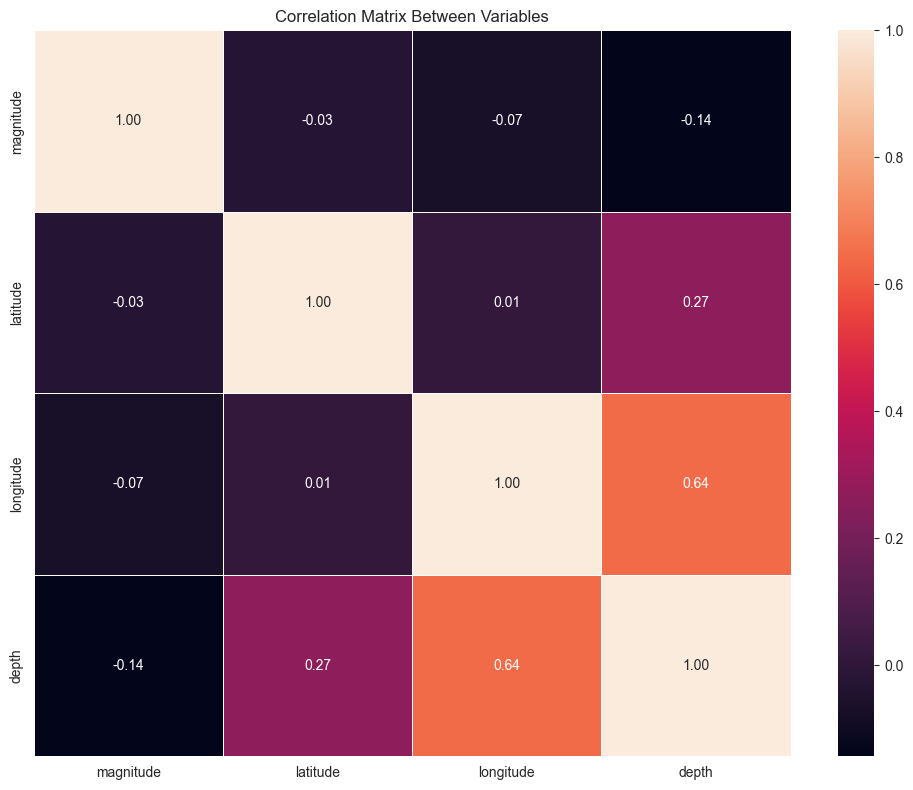

In [393]:
plt.figure(figsize=(10, 8))
numeric_columns = ['magnitude','latitude','longitude','depth']
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Variables')
plt.tight_layout()
plt.show()

### **Statistical Analysis of the Correlation Matrix**  

The correlation matrix provides insights into the linear relationships between different numerical variables: **magnitude, latitude, longitude, and depth**. The values range from **-1 to 1**, where:  
- **1** indicates a perfect positive correlation.  
- **-1** indicates a perfect negative correlation.  
- **0** means no correlation.  

#### **Key Statistical Observations:**  
1. **Magnitude Analysis:**  
   - The correlation between **magnitude and depth (-0.14)** suggests a weak negative relationship. This indicates that as the depth increases, the magnitude slightly decreases, but the relationship is not strong enough to be statistically significant.  
   - The correlations between **magnitude and latitude (-0.03)** and **magnitude and longitude (-0.07)** are very close to zero, meaning no meaningful linear relationship exists between these variables.  

2. **Latitude Analysis:**  
   - **Latitude and depth (0.27)** show a weak **positive correlation**, meaning that earthquakes occurring at higher latitudes tend to be slightly deeper. However, the correlation is not strong enough to imply a causal relationship.  
   - The correlation between **latitude and longitude (0.01)** is nearly zero, indicating that latitude does not influence longitude in this dataset.  

3. **Longitude Analysis:**  
   - The **longitude and depth correlation (0.64)** is **moderate to strong**, suggesting that as longitude increases, earthquakes tend to occur at greater depths. This might indicate a regional pattern where certain longitudes have deeper seismic activity.  
   - Longitude has **almost no correlation with magnitude (-0.07)** and latitude (0.01), meaning these variables are independent.  

4. **Depth Analysis:**  
   - Depth has the highest correlation with **longitude (0.64)**, which suggests a possible geographical pattern in earthquake occurrences.  
   - The **correlation between depth and latitude (0.27)** is weak, meaning latitude has a minor influence on earthquake depth.  

#### **Statistical Interpretation:**  
- Most correlations in this dataset are **weak to moderate**, meaning there is no strong **linear dependency** between the variables.  
- The **highest correlation (0.64)** is between **longitude and depth**, which suggests a meaningful geographical trend that could be further investigated.  
- The **negative correlation between magnitude and depth (-0.14)**, although weak, might indicate that shallow earthquakes tend to have slightly higher magnitudes.  
- The overall **low correlation values** suggest that other factors (e.g., geological conditions) might play a more significant role in earthquake characteristics rather than just these four variables.  



# Building Models For Prediction
### **Choosing an Algorithm for Modeling Based on the Correlation Matrix**  

The correlation matrix helps in understanding the relationships between variables, which is essential for selecting an appropriate **machine learning model**. Based on the observed correlations, different algorithms can be considered:  

#### **1. Regression Models (If Predicting a Continuous Variable)**
If the goal is to predict **magnitude** or **depth** as a continuous variable, then regression models can be used:  
- **Random Forest Regression**:  
  - Can handle non-linearity and weak correlations.  
  - Helps in identifying **feature importance** for better model explainability.  


#### **2. Clustering Models (If Detecting Patterns in Data)**
If the goal is to group similar earthquake events based on **latitude, longitude, depth, and magnitude**, clustering algorithms can help:  
- **K-Means Clustering**:  
  - Good for grouping earthquakes into similar regions.  
  - Assumes spherical clusters, which may not be ideal for geographical data.  
  

In [394]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [395]:
import re

# Function to extract city and country
def extract_location(region):
    match = re.search(r'of (.*), (.*)', region)
    if match:
        return match.group(1), match.group(2)  # Extract city and country
    return None, None  # Handle missing values

# Apply function to dataset
df[['City', 'Country']] = df['Region'].apply(lambda x: pd.Series(extract_location(x)))

The Region column in  dataset contains location descriptions (e.g., "84 km SW of Umm Bāb, Qatar"). This format is problematic for direct encoding because:

Contains distances and directions (84 km SW of), which are not useful as categorical values.
Has city and country names (Umm Bāb, Qatar), which should be extracted separately.
Too many unique values could lead to thousands of one-hot encoded features.

In [396]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'City' and 'Country'
city_encoder = LabelEncoder()
country_encoder = LabelEncoder()

df['City_Label'] = city_encoder.fit_transform(df['City'])
df['Country_Label'] = country_encoder.fit_transform(df['Country'])

features = df[['magnitude', 'latitude', 'longitude', 'Country_Label', 'City_Label']]
target = df['depth']
df

,latitude,longitude,depth,magnitude,Region,datetime,City,Country,City_Label,Country_Label
0,29.4815,51.5703,10.0,4.7,"17 km SSW of Kāzerūn, Iran",2025-03-10 08:46:23,Kāzerūn,Iran,451,6
1,24.6250,50.2773,10.0,4.1,"84 km SW of Umm Bāb, Qatar",2025-03-09 23:27:52,Umm Bāb,Qatar,738,17
2,36.5525,71.3579,110.6,4.2,"21 km SW of Ashkāsham, Afghanistan",2025-03-09 21:16:18,Ashkāsham,Afghanistan,72,0
3,27.3610,55.0404,10.0,4.7,"90 km N of Bandar-e Lengeh, Iran",2025-03-08 18:42:33,Bandar-e Lengeh,Iran,104,6
4,42.4647,45.1902,6.7,4.1,"42 km N of Mat’ani, Georgia",2025-03-08 11:28:26,Mat’ani,Georgia,491,4
...,...,...,...,...,...,...,...,...,...,...
4995,36.1657,70.6392,104.3,4.3,"19km NW of `Alaqahdari-ye Kiran wa Munjan, Afg...",2016-12-05 01:13:26,`Alaqahdari-ye Kiran wa Munjan,Afghanistan,788,0
4996,37.0311,71.3742,97.1,4.3,"40km NNW of Ishkashim, Tajikistan",2016-12-04 05:50:30,Ishkashim,Tajikistan,325,21
4997,28.4937,52.0077,32.8,4.3,"67km SW of Firuzabad, Iran",2016-12-03 12:37:12,Firuzabad,Iran,252,6
4998,36.8274,54.8089,10.0,4.0,"33km E of Gorgan, Iran",2016-12-02 22:29:50,Gorgan,Iran,275,6


In [397]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# **Random Forest Regressor**

In [398]:
# Train Random Forest Regressor
random_forest = RandomForestRegressor(
    n_estimators=50,   # Reduce number of trees
    max_depth=10,      # Limit tree depth
    n_jobs=-1,         # Use all CPU cores
    random_state=42
)
random_forest.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [399]:
# Predictions
y_pred = random_forest.predict(X_test)

In [400]:
# Evaluate Model
random_forest_acc = round(random_forest.score(X_train,y_train), 2)
print(f'\nModel Accuracy: {random_forest_acc * 100:.2f} %')


Model Accuracy: 96.00 %


In [401]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Random Forest Regression Results:
Mean Squared Error: 446.76
R² Score: 0.91


# **K-Means Clustering**

In [402]:
from sklearn.cluster import KMeans

# Select only numerical/geographical features for clustering
clustering_features = df[['latitude', 'longitude', 'depth']]

# Standardize features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Train K-Means Model (choose K=4 for now)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Check cluster distribution
print(df['Cluster'].value_counts())

Cluster
3    1530
2    1333
0    1330
1     807
Name: count, dtype: int64


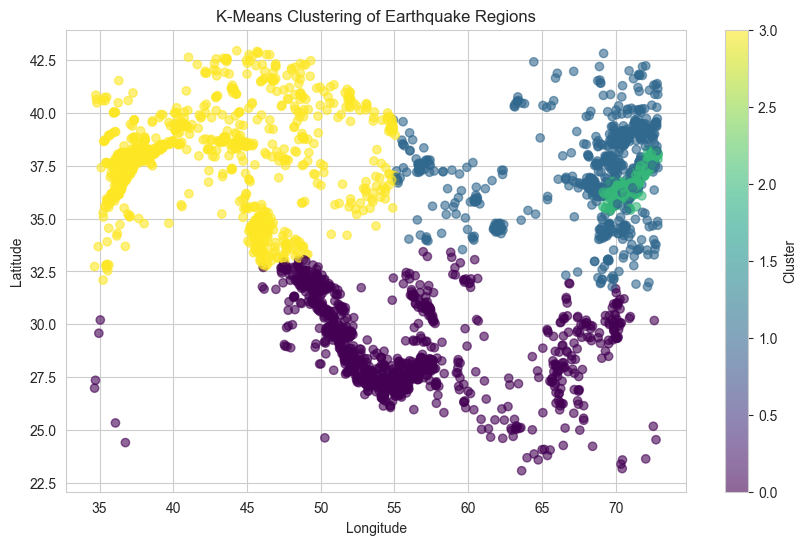

In [403]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Earthquake Regions')
plt.show()

The scatter plot displays earthquake data points clustered into 3 distinct groups, visualized on a longitude-latitude coordinate system:

Yellow cluster (Cluster 2): Located in the northwest portion of the map (approximately longitude 35-50°, latitude 35-42.5°). This cluster appears to have the highest density of points.
Light blue cluster (Cluster 1): Distributed across the northeastern region (approximately longitude 55-70°, latitude 37.5-42.5°). This cluster shows moderate density with some points extending toward the central region.
Pink/purple cluster (Cluster 0): Spanning the southern portion of the map (approximately longitude 35-70°, latitude 22.5-32.5°). This cluster has an arc-like distribution.